In [3]:
#import os
#os.getcwd()

In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime

In [13]:
stressd = pd.read_csv('/Users/selinzobu/Desktop/TILES/STRESSDscoredEMAs.csv', parse_dates = ['completed_ts'])
stressd = stressd.loc[:, ~stressd.columns.str.contains('^Unnamed')]
#stressd.set_index('days', inplace = True)
stressd.rename(columns={"completed_ts": "Timestamp"})
print(stressd.columns)
print(stressd.shape)
print(stressd.head())

Index(['participant_id', 'surveytype', 'start_ts', 'completed_ts', 'stressd',
       'Finished'],
      dtype='object')
(11361, 6)
                         participant_id surveytype                   start_ts  \
0  c7c4392b-02ee-40f4-a22f-ab2386c6ccf5        job  2018-03-05T06:01:53-08:00   
1  3a62899e-082a-4638-ab8b-b49f1ce12a20        job  2018-03-05T06:01:58-08:00   
2  a9dfbe4d-4076-48c7-a72b-342fe4c12514        job  2018-03-05T06:02:35-08:00   
3  7e6a98f1-73c3-4023-9bbd-acf2b70d04b5        job  2018-03-05T06:09:22-08:00   
4  8b13d979-315f-4357-8f0e-7c12df0a6ca8        job  2018-03-05T06:14:16-08:00   

                completed_ts  stressd  Finished  
0  2018-03-05 06:06:11-08:00      2.0         1  
1  2018-03-05 06:04:06-08:00      1.0         1  
2  2018-03-05 10:22:04-08:00      2.0         1  
3  2018-03-05 06:16:27-08:00      1.0         1  
4  2018-03-05 06:19:21-08:00      3.0         1  


In [14]:
stressd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  11361 non-null  object 
 1   surveytype      11361 non-null  object 
 2   start_ts        11361 non-null  object 
 3   completed_ts    11361 non-null  object 
 4   stressd         11274 non-null  float64
 5   Finished        11361 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 532.7+ KB


In [15]:
type(stressd["completed_ts"][0])

datetime.datetime

In [16]:
stressd["completed_ts"] = pd.to_datetime(stressd["completed_ts"], utc=True)

In [17]:
stressd.rename(columns={"completed_ts": "Timestamp"}, inplace = True)

In [18]:
stressd["Timestamp"] = pd.to_datetime(stressd["Timestamp"]).dt.date

In [19]:
print(stressd.head())

                         participant_id surveytype                   start_ts  \
0  c7c4392b-02ee-40f4-a22f-ab2386c6ccf5        job  2018-03-05T06:01:53-08:00   
1  3a62899e-082a-4638-ab8b-b49f1ce12a20        job  2018-03-05T06:01:58-08:00   
2  a9dfbe4d-4076-48c7-a72b-342fe4c12514        job  2018-03-05T06:02:35-08:00   
3  7e6a98f1-73c3-4023-9bbd-acf2b70d04b5        job  2018-03-05T06:09:22-08:00   
4  8b13d979-315f-4357-8f0e-7c12df0a6ca8        job  2018-03-05T06:14:16-08:00   

    Timestamp  stressd  Finished  
0  2018-03-05      2.0         1  
1  2018-03-05      1.0         1  
2  2018-03-05      2.0         1  
3  2018-03-05      1.0         1  
4  2018-03-05      3.0         1  


In [20]:
stressd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  11361 non-null  object 
 1   surveytype      11361 non-null  object 
 2   start_ts        11361 non-null  object 
 3   Timestamp       11361 non-null  object 
 4   stressd         11274 non-null  float64
 5   Finished        11361 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 532.7+ KB


In [21]:
stressd[stressd['participant_id'] == 'e6081755-d7f3-4c26-ab40-0709b8ad41ef' ]

,participant_id,surveytype,start_ts,Timestamp,stressd,Finished
1424,e6081755-d7f3-4c26-ab40-0709b8ad41ef,health,2018-04-09T06:26:15-07:00,2018-04-09,3.0,1
1585,e6081755-d7f3-4c26-ab40-0709b8ad41ef,health,2018-04-10T07:14:35-07:00,2018-04-10,1.0,1
1766,e6081755-d7f3-4c26-ab40-0709b8ad41ef,job,2018-04-11T18:14:15-07:00,2018-04-12,2.0,1
1812,e6081755-d7f3-4c26-ab40-0709b8ad41ef,health,2018-04-12T06:02:45-07:00,2018-04-12,3.0,1
2031,e6081755-d7f3-4c26-ab40-0709b8ad41ef,job,2018-04-13T18:11:04-07:00,2018-04-14,3.0,1
...,...,...,...,...,...,...
10056,e6081755-d7f3-4c26-ab40-0709b8ad41ef,job,2018-06-14T18:35:15-07:00,2018-06-15,2.0,1
10152,e6081755-d7f3-4c26-ab40-0709b8ad41ef,job,2018-06-15T18:19:12-07:00,2018-06-16,1.0,1
10239,e6081755-d7f3-4c26-ab40-0709b8ad41ef,health,2018-06-16T08:04:03-07:00,2018-06-16,1.0,1
10384,e6081755-d7f3-4c26-ab40-0709b8ad41ef,job,2018-06-17T18:35:49-07:00,2018-06-18,2.0,1


In [22]:
ptstre = stressd.groupby('participant_id')['Timestamp'].count()

print(ptstre)

participant_id
02581754-36cd-4b23-85ea-bf995c6dec83    32
0271c478-a56a-4c09-ab91-9743184dd71b    58
02b7a595-6508-46bd-8239-6deb433d6290    65
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    69
06b33ec4-706d-462f-a681-05491be38eb3    48
                                        ..
fae38580-1e2d-4491-9de5-7b75703ba4ce    59
fb3a4dd7-3cb5-438e-a75d-244d1aec4790     4
fcb14a4c-1ffa-4315-872a-a38833459885    63
fd79ab30-1199-4619-adbd-577d715d86ce    61
fdbd8c07-720c-4ae5-a3d8-aad56b54688c    68
Name: Timestamp, Length: 209, dtype: int64


<AxesSubplot: xlabel='participant_id'>

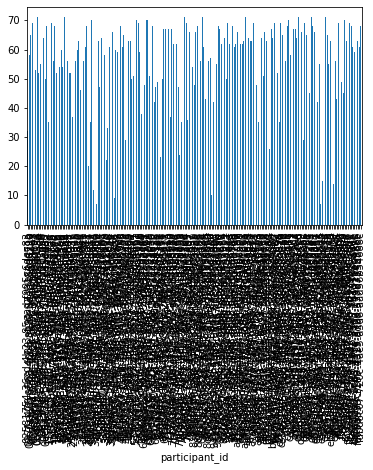

In [23]:
ptstre.plot(kind = 'bar')

In [24]:
by_score = stressd['stressd'].value_counts()
print(by_score)

1.0    5659
2.0    2797
3.0    2257
4.0     431
5.0     130
Name: stressd, dtype: int64


<AxesSubplot: >

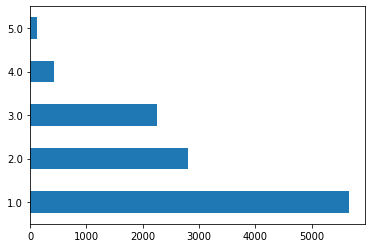

In [25]:
by_score.plot(kind = 'barh')


In [26]:
print(len(stressd['participant_id'].unique()))

209


In [27]:
print(stressd.columns)

Index(['participant_id', 'surveytype', 'start_ts', 'Timestamp', 'stressd',
       'Finished'],
      dtype='object')


In [28]:
print((stressd['surveytype'].unique()))

['job' 'health' 'personality']


In [29]:
print((stressd['Finished'].unique()))

[1 0]


In [30]:
#means are close??

fins = stressd.groupby(["Finished"])["stressd"].describe()
print(fins)

            count     mean       std  min  25%  50%  75%  max
Finished                                                     
0            96.0  1.84375  0.874530  1.0  1.0  2.0  3.0  4.0
1         11178.0  1.80900  0.961234  1.0  1.0  1.0  2.0  5.0


In [31]:
print(stressd[stressd['Finished'] != 1])  #173 rows > 96 rows after dropping NaNs

                             participant_id surveytype  \
26     29d662a9-f454-4261-8d58-f208c07cfd20        job   
85     3a62899e-082a-4638-ab8b-b49f1ce12a20        job   
92     df3a6b7a-7e27-4003-beea-2cb5cf08da83        job   
198    f596b3ca-7b25-4632-b986-7b44448d3f2f     health   
401    89ff7373-ee85-4764-a4dd-90138af9af85     health   
...                                     ...        ...   
11299  db2bffd9-c5b5-4fed-9d55-09a087ce0e6e        job   
11302  a2664330-dcfa-4d43-a788-8904343b6a00        job   
11303  e89b1ea7-a2ea-4f2f-ae5a-9a9d29af8639        job   
11326  a2676b6d-a28f-46bf-b3f0-6a2e735ae251        job   
11336  db2bffd9-c5b5-4fed-9d55-09a087ce0e6e        job   

                        start_ts   Timestamp  stressd  Finished  
26     2018-03-05T18:10:11-08:00  2018-03-06      NaN         0  
85     2018-03-07T06:24:13-08:00  2018-03-07      1.0         0  
92     2018-03-07T08:16:29-08:00  2018-03-07      NaN         0  
198    2018-03-09T10:07:04-08:00  2018-

In [32]:
#Missing Data 

stressd.isnull().sum()  #87 stressd missing

participant_id     0
surveytype         0
start_ts           0
Timestamp          0
stressd           87
Finished           0
dtype: int64

In [33]:
print(len(stressd[stressd.Finished == 0]))

173


In [35]:
print(stressd.iloc[[ 85,   198,   401,   577,   810,   893,   913,  1292,  1296,
             1358,  1792,  1872,  2018,  2052,  2195,  2513,  2567,  2722,
             2742,  2778,  2791,  2865,  2868,  3025,  3128,  3140,  3233,
             3281,  3284,  3630,  3966,  4038,  4444,  4497,  4595,  4868,
             5084,  5097,  5148,  5297,  5479,  5484,  5537,  5668,  5705,
             5710,  5807,  5874,  5901,  6061,  6097,  6133,  6267,  6337,
             6341,  6842,  6957,  7003,  7046,  7106,  7157,  7396,  7528,
             7555,  7561,  7594,  7777,  7965,  8219,  8299,  9226,  9329,
             9415,  9442,  9525,  9802,  9969,  9970, 10052, 10069, 10089,
            10145, 10376, 10417, 10633, 10767, 10777, 10886, 10982, 11012,
            11086, 11135]])

                             participant_id surveytype  \
85     3a62899e-082a-4638-ab8b-b49f1ce12a20        job   
198    f596b3ca-7b25-4632-b986-7b44448d3f2f     health   
401    89ff7373-ee85-4764-a4dd-90138af9af85     health   
577    16213162-1d73-4155-8103-fa668f1579b6        job   
810    6ceb4ef3-6578-45cc-bc02-fa97614313e1        job   
...                                     ...        ...   
10886  7e883e52-65af-4edb-9d55-a72ba5f03287     health   
10982  cc25830a-254a-487f-acec-c0afb3962679     health   
11012  4b5a5d57-0ad9-49fc-913f-d9e33b90b159        job   
11086  9548d1c4-bd4a-4841-9146-c0678135069d        job   
11135  3bdb1a29-023b-4fb5-8f49-6d285446179d     health   

                        start_ts   Timestamp  stressd  Finished  
85     2018-03-07T06:24:13-08:00  2018-03-07      1.0         0  
198    2018-03-09T10:07:04-08:00  2018-03-09      3.0         0  
401    2018-03-14T12:53:26-07:00  2018-03-14      1.0         0  
577    2018-03-19T18:01:10-07:00  2018-

In [36]:
mis_val= stressd.isna().sum()
mis_val_per = stressd.isna().sum()/len(stressd)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
stressd,87.0,0.8
participant_id,NaN,NaN
surveytype,NaN,NaN
start_ts,NaN,NaN
Timestamp,NaN,NaN
Finished,NaN,NaN


In [30]:
import missingno as msno

<AxesSubplot: >

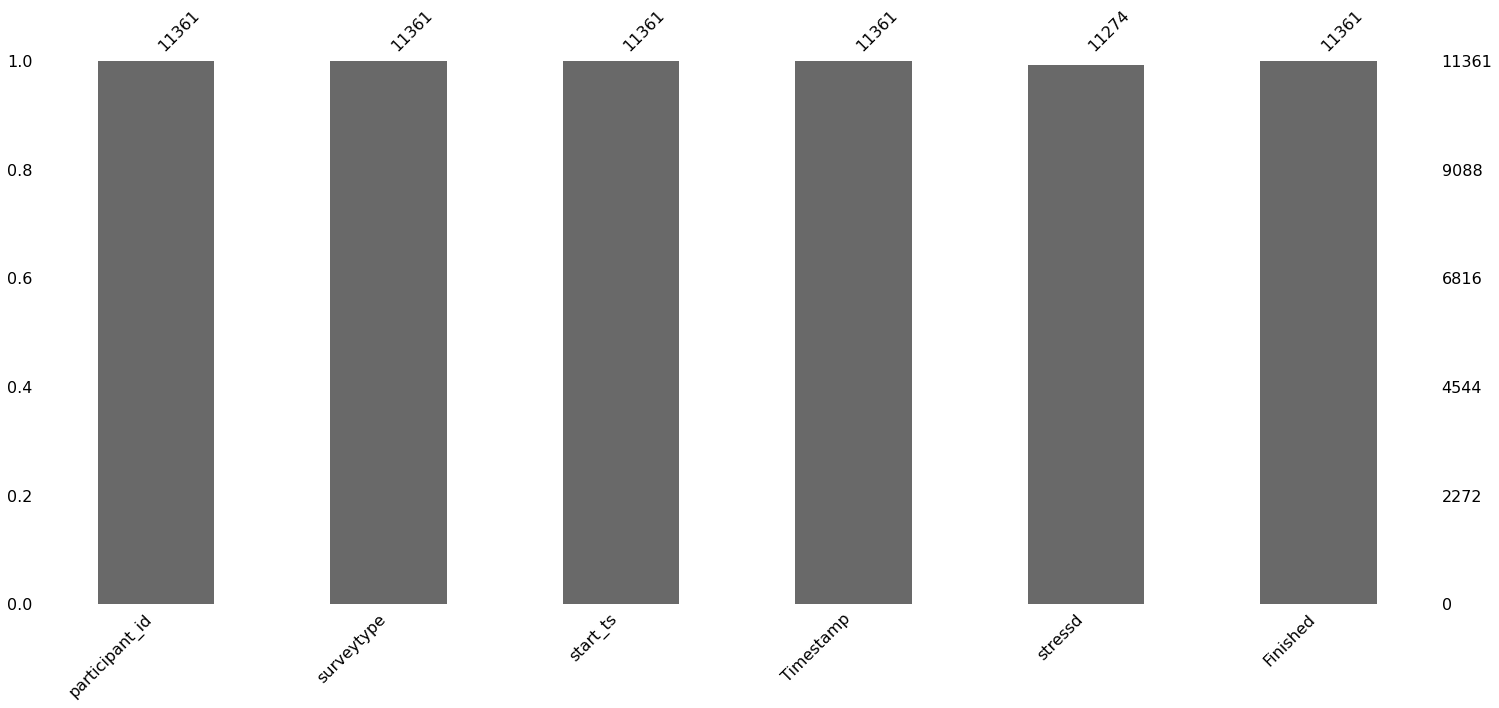

In [31]:
msno.bar(stressd)

<AxesSubplot: >

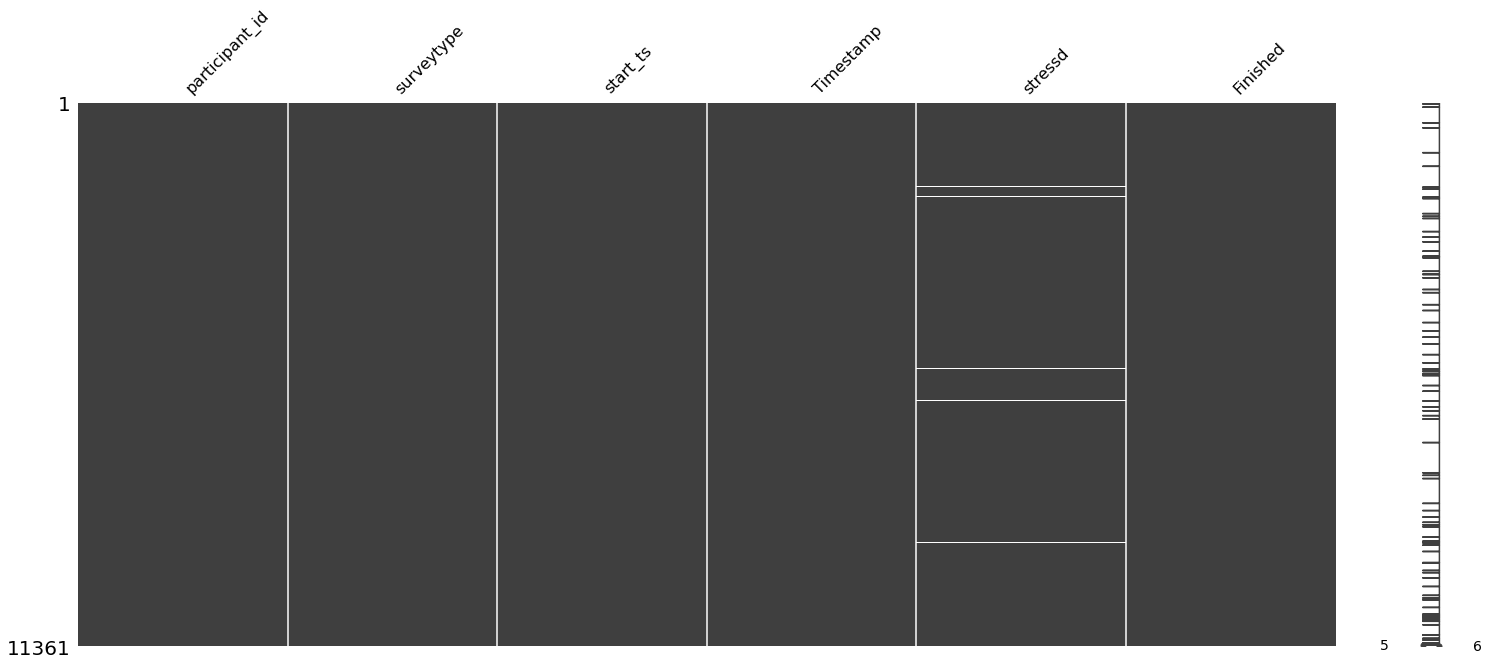

In [31]:
msno.matrix(stressd)

In [37]:
parti= stressd.groupby(["participant_id"])["stressd"].count()

In [38]:
print(parti)

participant_id
02581754-36cd-4b23-85ea-bf995c6dec83    30
0271c478-a56a-4c09-ab91-9743184dd71b    55
02b7a595-6508-46bd-8239-6deb433d6290    65
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    69
06b33ec4-706d-462f-a681-05491be38eb3    48
                                        ..
fae38580-1e2d-4491-9de5-7b75703ba4ce    58
fb3a4dd7-3cb5-438e-a75d-244d1aec4790     4
fcb14a4c-1ffa-4315-872a-a38833459885    63
fd79ab30-1199-4619-adbd-577d715d86ce    61
fdbd8c07-720c-4ae5-a3d8-aad56b54688c    68
Name: stressd, Length: 209, dtype: int64


In [39]:
tsparti= stressd.groupby(["participant_id", 'Timestamp'])["stressd"].count()

In [40]:
print(tsparti)

participant_id                        Timestamp 
02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-10    1
                                      2018-04-11    1
                                      2018-04-13    2
                                      2018-04-15    1
                                      2018-04-16    1
                                                   ..
fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-08    1
                                      2018-07-10    2
                                      2018-07-11    1
                                      2018-07-13    1
                                      2018-07-14    1
Name: stressd, Length: 8295, dtype: int64


In [41]:
sparti= stressd.groupby(["participant_id", 'surveytype'])["stressd"].count()

In [43]:
print(sparti)

participant_id                        surveytype 
02581754-36cd-4b23-85ea-bf995c6dec83  health         13
                                      job            15
                                      personality     2
0271c478-a56a-4c09-ab91-9743184dd71b  health         28
                                      job            23
                                                     ..
fd79ab30-1199-4619-adbd-577d715d86ce  job            28
                                      personality     5
fdbd8c07-720c-4ae5-a3d8-aad56b54688c  health         33
                                      job            31
                                      personality     4
Name: stressd, Length: 619, dtype: int64


In [44]:
print(max(parti))
print(min(parti))
print(len(parti))
print(parti[0:10])

71
1
209
participant_id
02581754-36cd-4b23-85ea-bf995c6dec83    30
0271c478-a56a-4c09-ab91-9743184dd71b    55
02b7a595-6508-46bd-8239-6deb433d6290    65
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    69
06b33ec4-706d-462f-a681-05491be38eb3    48
0a85fd46-fada-434c-9f7a-08b81f9ed8e7    53
0adb7679-9d26-46e7-a134-11da293910f3    69
0b45e9c1-eba5-46d3-b0a4-cdb5aa4dc736    50
0bf54591-e0ac-47ba-9b43-31ff54dfcee8    55
0e33f78a-7064-44ff-a8a4-711f99113d39    61
Name: stressd, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='stressd', ylabel='Density'>

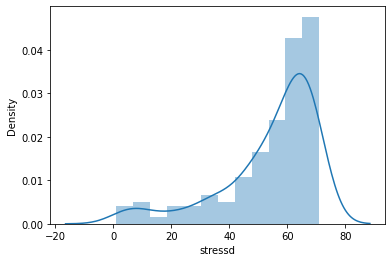

In [45]:
sns.distplot(parti)

In [42]:
print(max(sparti))
print(min(sparti))
print(sparti[0:30])

35
1
participant_id                        surveytype 
02581754-36cd-4b23-85ea-bf995c6dec83  health         13
                                      job            15
                                      personality     2
0271c478-a56a-4c09-ab91-9743184dd71b  health         28
                                      job            23
                                      personality     4
02b7a595-6508-46bd-8239-6deb433d6290  health         33
                                      job            28
                                      personality     4
05dedb61-63bc-44e3-8e28-a5d32d91f7e9  health         33
                                      job            31
                                      personality     5
06b33ec4-706d-462f-a681-05491be38eb3  health         24
                                      job            21
                                      personality     3
0a85fd46-fada-434c-9f7a-08b81f9ed8e7  health         27
                                      job        

In [46]:
print(max(tsparti))
print(min(tsparti))
print(tsparti[0:30])

2
0
participant_id                        Timestamp 
02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-10    1
                                      2018-04-11    1
                                      2018-04-13    2
                                      2018-04-15    1
                                      2018-04-16    1
                                      2018-04-18    1
                                      2018-04-20    1
                                      2018-04-22    1
                                      2018-04-23    1
                                      2018-04-25    2
                                      2018-04-27    1
                                      2018-04-28    2
                                      2018-05-02    1
                                      2018-05-03    1
                                      2018-05-05    0
                                      2018-05-06    1
                                      2018-05-08    2
                             

In [47]:
#drop a row if any of its values are missing
print(stressd.shape)
stressd.dropna(how = 'any', inplace = True)
print(stressd.shape)

#print(11361 - 11274)  #87 rows gone

(11361, 6)
(11274, 6)


In [48]:
print(len(stressd['participant_id'].unique())) #209 still??

209


In [49]:
stressd.isnull().sum()  #92 finished missing

participant_id    0
surveytype        0
start_ts          0
Timestamp         0
stressd           0
Finished          0
dtype: int64

In [50]:
stressd.shape

(11274, 6)

In [46]:
#print(fitbit['days'].value_counts()) 

In [47]:
#Visualize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
print(stressd.head())

                         participant_id surveytype                   start_ts  \
0  c7c4392b-02ee-40f4-a22f-ab2386c6ccf5        job  2018-03-05T06:01:53-08:00   
1  3a62899e-082a-4638-ab8b-b49f1ce12a20        job  2018-03-05T06:01:58-08:00   
2  a9dfbe4d-4076-48c7-a72b-342fe4c12514        job  2018-03-05T06:02:35-08:00   
3  7e6a98f1-73c3-4023-9bbd-acf2b70d04b5        job  2018-03-05T06:09:22-08:00   
4  8b13d979-315f-4357-8f0e-7c12df0a6ca8        job  2018-03-05T06:14:16-08:00   

    Timestamp  stressd  Finished  
0  2018-03-05      2.0         1  
1  2018-03-05      1.0         1  
2  2018-03-05      2.0         1  
3  2018-03-05      1.0         1  
4  2018-03-05      3.0         1  


In [51]:
stressd2 = stressd.drop(labels = ['start_ts', 'Finished', 'surveytype'], axis = 1)

In [52]:
stressd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11274 entries, 0 to 11360
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  11274 non-null  object 
 1   Timestamp       11274 non-null  object 
 2   stressd         11274 non-null  float64
dtypes: float64(1), object(2)
memory usage: 352.3+ KB


In [53]:
type(stressd2)

pandas.core.frame.DataFrame

In [59]:
li = (sum([stressd2.groupby(['participant_id','Timestamp'])['stressd'].count() > 1]))
             
#daypp = merged.groupby(['participant_id'])['Timestamp'].count()

print(li.sum()) #3027 more than once a day per participant
print(len(li)) #8247 unique values per day per participant

print(li[li ==1])

3027
8247
participant_id                        Timestamp 
02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-13    1
                                      2018-04-25    1
                                      2018-04-28    1
                                      2018-05-08    1
0271c478-a56a-4c09-ab91-9743184dd71b  2018-05-11    1
                                                   ..
fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-06-28    1
                                      2018-07-02    1
                                      2018-07-04    1
                                      2018-07-06    1
                                      2018-07-10    1
Name: stressd, Length: 3027, dtype: int64


In [60]:
stressd2.head()

,participant_id,Timestamp,stressd
0,c7c4392b-02ee-40f4-a22f-ab2386c6ccf5,2018-03-05,2.0
1,3a62899e-082a-4638-ab8b-b49f1ce12a20,2018-03-05,1.0
2,a9dfbe4d-4076-48c7-a72b-342fe4c12514,2018-03-05,2.0
3,7e6a98f1-73c3-4023-9bbd-acf2b70d04b5,2018-03-05,1.0
4,8b13d979-315f-4357-8f0e-7c12df0a6ca8,2018-03-05,3.0


In [62]:
stre2 = pd.DataFrame()

stre2['mstressd'] = stressd2.groupby(['participant_id', 'Timestamp'])['stressd'].mean()
stre2.reset_index(level=['participant_id', 'Timestamp'], inplace=True)
print(stre2)
print()
ali = (sum([stre2.groupby(['participant_id','Timestamp'])['mstressd'].count() > 1]))
print(ali.sum()) #no repeating stress scores on the same day per participant
print(len(ali)) #unique values 
print(len(stre2['participant_id'].unique())) #209 participants still

                            participant_id   Timestamp  mstressd
0     02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-10       2.0
1     02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-11       2.0
2     02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-13       1.0
3     02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-15       1.0
4     02581754-36cd-4b23-85ea-bf995c6dec83  2018-04-16       1.0
...                                    ...         ...       ...
8242  fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-08       1.0
8243  fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-10       1.5
8244  fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-11       1.0
8245  fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-13       1.0
8246  fdbd8c07-720c-4ae5-a3d8-aad56b54688c  2018-07-14       1.0

[8247 rows x 3 columns]

0
8247
209


In [64]:
stre2

,participant_id,Timestamp,mstressd
0,02581754-36cd-4b23-85ea-bf995c6dec83,2018-04-10,2.0
1,02581754-36cd-4b23-85ea-bf995c6dec83,2018-04-11,2.0
2,02581754-36cd-4b23-85ea-bf995c6dec83,2018-04-13,1.0
3,02581754-36cd-4b23-85ea-bf995c6dec83,2018-04-15,1.0
4,02581754-36cd-4b23-85ea-bf995c6dec83,2018-04-16,1.0
...,...,...,...
8242,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2018-07-08,1.0
8243,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2018-07-10,1.5
8244,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2018-07-11,1.0
8245,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,2018-07-13,1.0


In [65]:
os.makedirs('/Users/selinzobu/Desktop/TILES/', exist_ok=True)  
stre2.to_csv('/Users/selinzobu/Desktop/TILES/1STRESSD.csv')  

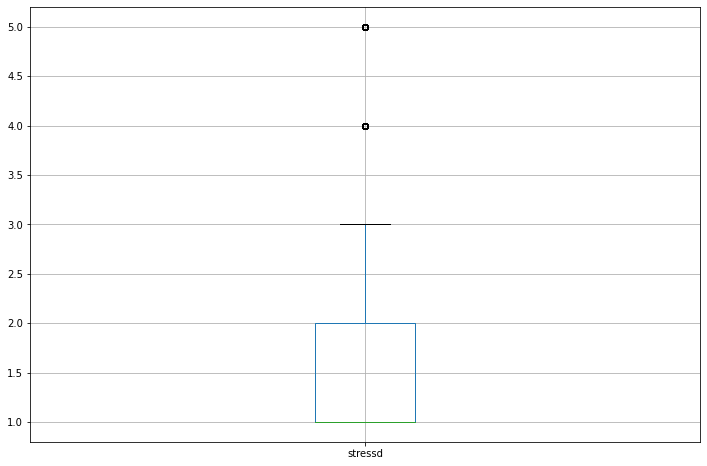

In [53]:
plt.figure(figsize = (12,8))
stressd2.boxplot()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7d314c53a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7d314c5a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7d314c5070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7d31505eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7d31505910>],
 'means': [<matplotlib.lines.Line2D at 0x7f7d31505100>]}

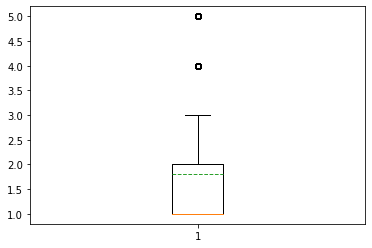

In [54]:
plt.boxplot(stressd2.stressd,meanline = True, showmeans= True)

<AxesSubplot: >

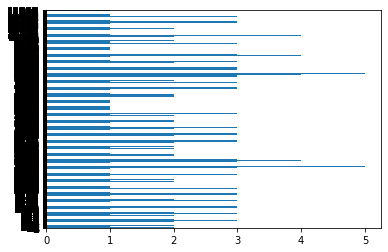

In [55]:
stressd2['stressd'].plot(kind = 'barh')

In [56]:
print(stressd2)

                             participant_id   Timestamp  stressd
0      c7c4392b-02ee-40f4-a22f-ab2386c6ccf5  2018-03-05      2.0
1      3a62899e-082a-4638-ab8b-b49f1ce12a20  2018-03-05      1.0
2      a9dfbe4d-4076-48c7-a72b-342fe4c12514  2018-03-05      2.0
3      7e6a98f1-73c3-4023-9bbd-acf2b70d04b5  2018-03-05      1.0
4      8b13d979-315f-4357-8f0e-7c12df0a6ca8  2018-03-05      3.0
...                                     ...         ...      ...
11356  883aca61-af06-4c14-ba58-8d2e4b75bfda  2018-07-14      1.0
11357  96a272fc-166f-4fe4-8aeb-3874264f3b54  2018-07-14      4.0
11358  8a2a2baf-826f-445d-a7fe-3a9b7f5d2334  2018-07-14      1.0
11359  eb4e1be4-29de-4120-9727-0ce8041da479  2018-07-14      1.0
11360  f732e878-e538-49b8-97d3-49ca29e9a3f8  2018-07-14      1.0

[11274 rows x 3 columns]


In [46]:
#sns.countplot(stressd2['stressd'])

In [58]:
sns.set_style('darkgrid')

<AxesSubplot: xlabel='stressd', ylabel='count'>

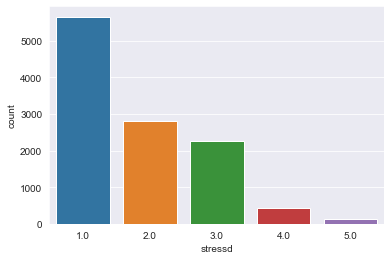

In [59]:
sns.countplot(x= 'stressd', data = stressd2)

In [47]:
#sns.countplot(stressd2['stressd'].value_counts())

In [49]:
#stressd2.stressd.value_counts().index

In [48]:
#sns.countplot(x = 'stressd', data = stressd2)

<AxesSubplot: xlabel='stressd', ylabel='count'>

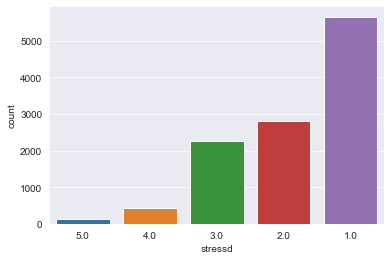

In [63]:
sns.countplot(x = 'stressd', data = stressd2, order = stressd2.stressd.value_counts().index[::-1])

<AxesSubplot: xlabel='count', ylabel='stressd'>

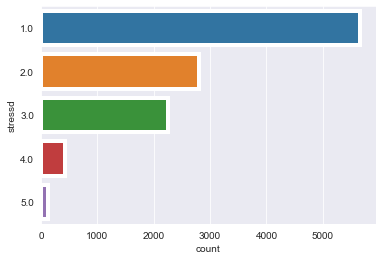

In [67]:
sns.countplot(y = 'stressd', data = stressd2, lw = 4)

In [61]:
print(type(stressd2['stressd'].value_counts()))
stressd2['stressd'].value_counts()[3]

<class 'pandas.core.series.Series'>


2257

In [43]:
stressd2.isnull().sum()

participant_id    0
Timestamp         0
stressd           0
dtype: int64

In [63]:
#Outliers : Z Score

outliers = []
def detect_outliers(data):
    threshold =3
    mean = np.mean(data)
    std = np.std(data)
    
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [64]:
outlier_s = detect_outliers(stressd2.stressd)
print(len(outlier_s))

130


In [65]:
#outlier_orm = detect_outliers(fitbit['Out of Range_min'])
#print(len(outlier_orm))

In [66]:
print(stressd2.stressd)

0        2.0
1        1.0
2        2.0
3        1.0
4        3.0
        ... 
11356    1.0
11357    4.0
11358    1.0
11359    1.0
11360    1.0
Name: stressd, Length: 11274, dtype: float64


In [ ]:
#Outliers : Scatter plot & Boxplots

In [44]:
print(stressd2)

                             participant_id              completed_ts  stressd
0      c7c4392b-02ee-40f4-a22f-ab2386c6ccf5 2018-03-05 14:06:11+00:00      2.0
1      3a62899e-082a-4638-ab8b-b49f1ce12a20 2018-03-05 14:04:06+00:00      1.0
2      a9dfbe4d-4076-48c7-a72b-342fe4c12514 2018-03-05 18:22:04+00:00      2.0
3      7e6a98f1-73c3-4023-9bbd-acf2b70d04b5 2018-03-05 14:16:27+00:00      1.0
4      8b13d979-315f-4357-8f0e-7c12df0a6ca8 2018-03-05 14:19:21+00:00      3.0
...                                     ...                       ...      ...
11356  883aca61-af06-4c14-ba58-8d2e4b75bfda 2018-07-14 03:22:08+00:00      1.0
11357  96a272fc-166f-4fe4-8aeb-3874264f3b54 2018-07-14 03:31:54+00:00      4.0
11358  8a2a2baf-826f-445d-a7fe-3a9b7f5d2334 2018-07-14 03:51:33+00:00      1.0
11359  eb4e1be4-29de-4120-9727-0ce8041da479 2018-07-14 04:48:41+00:00      1.0
11360  f732e878-e538-49b8-97d3-49ca29e9a3f8 2018-07-14 05:40:40+00:00      1.0

[11274 rows x 3 columns]


In [67]:
print(stressd2)

                             participant_id               completed_ts  \
0      c7c4392b-02ee-40f4-a22f-ab2386c6ccf5  2018-03-05T06:06:11-08:00   
1      3a62899e-082a-4638-ab8b-b49f1ce12a20  2018-03-05T06:04:06-08:00   
2      a9dfbe4d-4076-48c7-a72b-342fe4c12514  2018-03-05T10:22:04-08:00   
3      7e6a98f1-73c3-4023-9bbd-acf2b70d04b5  2018-03-05T06:16:27-08:00   
4      8b13d979-315f-4357-8f0e-7c12df0a6ca8  2018-03-05T06:19:21-08:00   
...                                     ...                        ...   
11356  883aca61-af06-4c14-ba58-8d2e4b75bfda  2018-07-13T20:22:08-07:00   
11357  96a272fc-166f-4fe4-8aeb-3874264f3b54  2018-07-13T20:31:54-07:00   
11358  8a2a2baf-826f-445d-a7fe-3a9b7f5d2334  2018-07-13T20:51:33-07:00   
11359  eb4e1be4-29de-4120-9727-0ce8041da479  2018-07-13T21:48:41-07:00   
11360  f732e878-e538-49b8-97d3-49ca29e9a3f8  2018-07-13T22:40:40-07:00   

       stressd  
0          2.0  
1          1.0  
2          2.0  
3          1.0  
4          3.0  
...      

In [68]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

<AxesSubplot:xlabel='stressd', ylabel='completed_ts'>

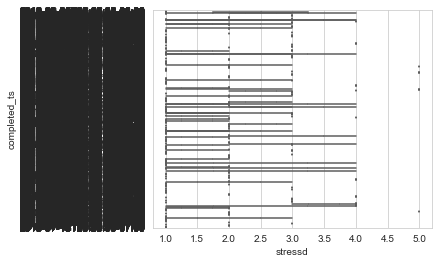

In [69]:
sns.boxplot(x = 'stressd',y = 'completed_ts', data = stressd2, palette = 'hls')

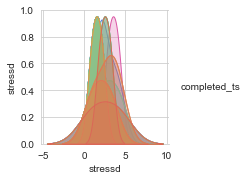

In [70]:
sns.pairplot(stressd2, hue = 'completed_ts', palette = 'hls')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stressd', ylabel='Density'>

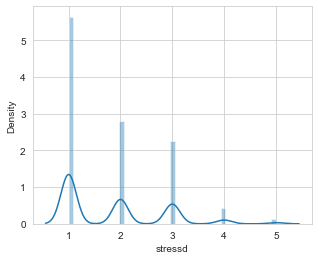

In [71]:
sns.distplot(stressd2['stressd'])